   
<img src="https://practicum-content.s3.amazonaws.com/resources/DA_1713265846.png" alt="Prueba">


# Proyecto Intergrado.


## Descripción del proyecto
 Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
from scipy import stats as st
from scipy.stats import pearsonr

In [2]:
# Cargar el dataset
url = "https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv"
base_df =pd.read_csv(url)

In [3]:
#Revisamos la muestra
base_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Revisamos los DataFrame
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Obtenemos mentricas basicas
base_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# Y los datos de los objetos
base_df.describe(include=object)

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Conclusion

Después del analisis rapido podemos concluir que:

Tenemos valores ausentes en las columnas: Name, Year_of_Release y Genre pero nos tan significativos por lo que evaluaremos borrarlos de la muestra, pero en el caso de las columnas: Critic_Score, User_Score,  Rating  se analisara a fondo por que son considerables con mas del 40% de valores asuentes aproximandamente.


<img src="https://practicum-content.s3.amazonaws.com/resources/DA_1713265860.png" alt="Procesamiento">

##  Procesamiento de datos

 ### Descripción de datos
 
 Acontinuación revisamos la descripcion de las valores del Data Frame:
 
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género) 
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 
* EU_sales (ventas en Europa en millones de dólares estadounidenses) 
* JP_sales (ventas en Japón en millones de dólares estadounidenses) 
* Other_sales (ventas en otros países en millones de dólares estadounidenses) 
* Critic_Score (máximo de 100) 
* User_Score (máximo de 10) 
* Rating (ESRB)

> [Importante]
> Es posible que los datos de 2016 estén incompletos.




In [7]:
#Cambiamos las columnas estandarizadas en minusculas
base_df.columns = base_df.columns.str.lower()
print (base_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [8]:
#Revisamos los valores ausente
base_df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#Aqui calculamos el porcentaje de los valores ausentes por columna
porcentaje = base_df.isnull().sum()/len(base_df)*100
print(porcentaje) 

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64


In [10]:
#Revisamos los valores de la columna name y comprobamos que son los mismo registros con valores ausente de genre  
base_df[base_df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#Ya que solo son 2 valores los eliminamos de la muestra
base_df = base_df.dropna(subset=['name'], axis=0).reset_index(drop=True)

In [12]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
#Revisamos los valores ausentes para year_of_release
base_df[base_df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
#En esta ocasion vamos a sustituir los valores ausentes con la media de la misma plataforma y género.
base_df['year_of_release'].fillna(base_df.groupby(['platform','genre'])['year_of_release'].transform('mean'),inplace=True)
base_df['year_of_release'].isnull().sum()

0

In [15]:
#Cambiar tipo de dato
base_df['year_of_release'] = base_df['year_of_release'].astype('int')

In [16]:
base_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
# Ahora revisamos los valores asuentes de rating
base_df['rating'].isnull().sum()

6764

<img src="https://practicum-content.s3.amazonaws.com/resources/DA_1713265957.png" alt="Análisis">

In [18]:
# Ya que corresponden a casi un 41% de los datos la columna en esta ocasion vamos a rellenar los valores asentes con el de mayor frecuencia del genero.
base_df['rating'].fillna(base_df.groupby(['genre'])['rating'].transform(lambda x: x.fillna(x.mode()[0])),inplace=True)
base_df['rating'].isnull().sum()

0

In [19]:
base_df['rating'].unique()

array(['E', 'T', 'M', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Ya en este momento tenemos la columna rating completa y estos son sus valores:

* E (Everyone o Apto para todos).
* T (Adolescentes mayores de 13 años).
* M (Mature mayores de 17 años).
* E10+ (Todos mayores de 10 años).
* K-A (Niños a Adultos mayores de 10 años) hasta 1998.
* A0 (Adultos únicamente mayores de 18 años en adelante).
* EC (Infancia temprana mayores de 3 años) hasta 2018. 
* RP (Rated Pending o Clasificación Pendiente).

In [20]:
base_df[base_df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,M
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E


In [21]:
base_df[base_df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,M
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E


In [22]:
base_df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [23]:
# Sustituiremos el valor tbd (por determinar) por valor ausente y nos quedan 9123 valores ausentes en use_score
base_df.loc[base_df['user_score'] == 'tbd', 'user_score'] = np.nan
base_df['user_score'] = (base_df['user_score'].astype(float))
base_df['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [24]:
base_df['critic_score'].isnull().sum()

8576

In [25]:
base_df['critic_score'].corr(base_df['user_score'])

0.5808778320767236

In [26]:
#Al contar correlacion considerable buena entre critic_score y user_score vamos a rellenamos los valores con la mediana 
base_df['critic_score'].fillna(base_df.groupby(['user_score'])['critic_score'].transform('median'),inplace=True)
base_df['critic_score'].isnull().sum()

8014

In [27]:
#Y aplicamos el mismo metodo pero esta vez con los valores rating por plataforma para critic_score y validamos 
base_df['critic_score'].fillna(base_df.groupby(['rating', 'platform'])['critic_score'].transform('median'),inplace=True)
base_df['critic_score'].isnull().sum()

1125

In [28]:
#Y aplicamos el mismo metodo pero esta vez con los valores rating por plataforma para user_score y validamos
base_df['user_score'].fillna(base_df.groupby(['rating', 'platform'])['user_score'].transform('median'),inplace=True)
base_df['user_score'].isnull().sum()

1125

In [29]:
# Por ultimo rellenamos con la mediana critic_score basada en el mismo rating y validamos que no tengamos valores ausentes
base_df['critic_score'].fillna(base_df.groupby(['rating'])['critic_score'].transform('median'),inplace=True)
base_df['critic_score'].isnull().sum()

0

In [30]:
# Por ultimo rellenamos con la mediana de user_score basada en el mismo rating  y validamos que no tengamos valores ausentes
base_df['user_score'].fillna(base_df.groupby(['rating'])['user_score'].transform('median'),inplace=True)
base_df['user_score'].isnull().sum()

0

In [31]:
#Revisamos todas nuestars columna
base_df.isnull().sum()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [32]:
#Calculamos las ventas totales con la sumatoria de las regiones 
base_df['total_sales'] = base_df['na_sales'] + base_df['eu_sales'] + base_df['jp_sales'] + base_df['other_sales']



In [33]:
#Y establecemos una nueva columna con el promedio las ventas por año en relacion al año de lanzamientos y el tope de neustra muestra meramente estadistico.
base_df['sales_for_year'] = round( base_df['total_sales'] /  (2017-base_df['year_of_release'])  ,2)


In [34]:
#Mostramos nuestra muestra trabajada
base_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_for_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,7.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.3,E,40.24,1.26
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,3.95
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,4.10
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70.0,7.6,T,31.38,1.49


In [35]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
 12  sales_for_year   16713 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.7+ MB


### Conclusion:   

Se normalizaron los nombres de las columna en minusculas corregimos algunos tipos datos para su analisis correcto y nos encargamos de los valores ausentes gracias a la buena correlacion de las columna critic_score y user_score en base a esto rellenamos con la mendiana. 

Además de enriquecer nuestro Database con la columna de ventas totales que representa el la venta global corespondiente a todas las regiones y un valor estadistico con el porcentaje correspondiente a la ventas por año en realcion al año de lanzamiento y el valor maximo de la muestra 2017. 

Ya con nuestra base completa pasaremos al analisis de los datos.
 

 <img src="https://practicum-content.s3.amazonaws.com/resources/DA_1713265873.png" alt="Análisis"> 

#  Análisis  

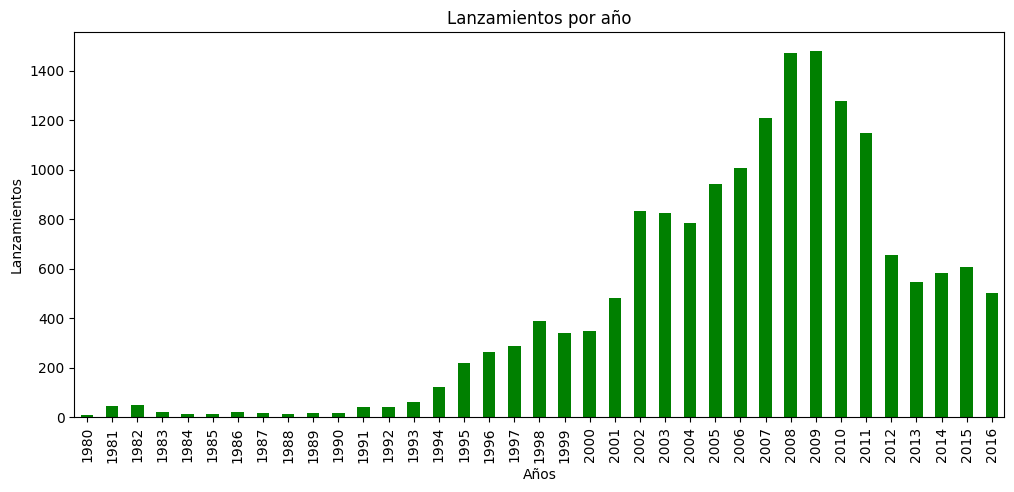

In [36]:
#Empezaremos revisando los lanzamientos por año
base_df.groupby('year_of_release')['platform'].count().plot(
    kind='bar',
    title='Lanzamientos por año', 
    figsize=[12, 5],
    color=['Green'],
    xlabel='Años',
    ylabel='Lanzamientos',
)

plt.show()

Revisando que tenemos nuestro mejores año entre el 2006 y 2011 aproximandamente.

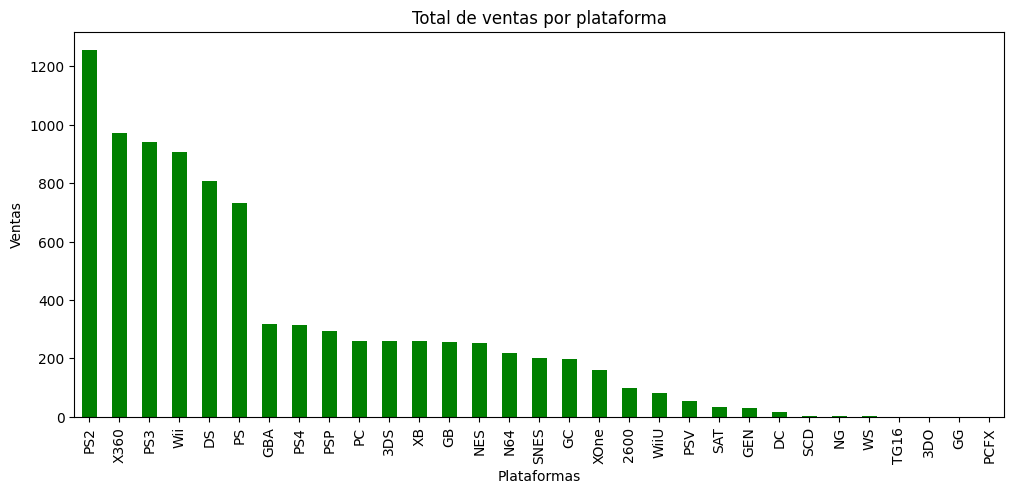

In [37]:
base_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar',
    title='Total de ventas por plataforma', 
    figsize=[12, 5],
    color=['Green'],
    xlabel='Plataformas',
    ylabel='Ventas',
)

plt.show()

In [38]:
base_df.groupby('name')['total_sales'].sum().sort_values(ascending=False)

name
Wii Sports                                                                                                    82.54
Grand Theft Auto V                                                                                            56.58
Super Mario Bros.                                                                                             45.31
Tetris                                                                                                        35.84
Mario Kart Wii                                                                                                35.52
                                                                                                              ...  
Smart Kid's Mega Game Mix                                                                                      0.01
Koi Sentai Love & Peace the P.S.P: Power Zenkai! Special Youso Tenkomori de Portable Ka Daisakusen de Aru!     0.01
Smiley World: Island Challenge                                     

In [39]:
# Grand Theft Auto V es el segundo lugar apezar de estar en 5 plataformas en coparacion a Wii Sports  que solo salio para Wii y es el número 1
base_df.query("name=='Grand Theft Auto V'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_for_year
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.26
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,4.07
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4.21
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,1.82
1729,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17,0.59


In [40]:
base_df.query("name=='Wii Sports'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_for_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,7.5


In [41]:
sales_year = base_df[base_df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])].groupby(["platform","year_of_release"]).size().unstack()
sales_year

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,379.0,519.0,403.0,323.0,153.0,23.0,8.0,NaN,NaN,NaN
PS,NaN,17.0,99.0,164.0,188.0,255.0,200.0,160.0,91.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,185.0,280.0,...,214.0,191.0,96.0,38.0,7.0,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,138.0,164.0,192.0,227.0,148.0,126.0,108.0,73.0,38.0
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,185.0,295.0,346.0,253.0,143.0,31.0,12.0,6.0,4.0,1.0
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124.0,147.0,194.0,188.0,206.0,106.0,75.0,63.0,35.0,13.0


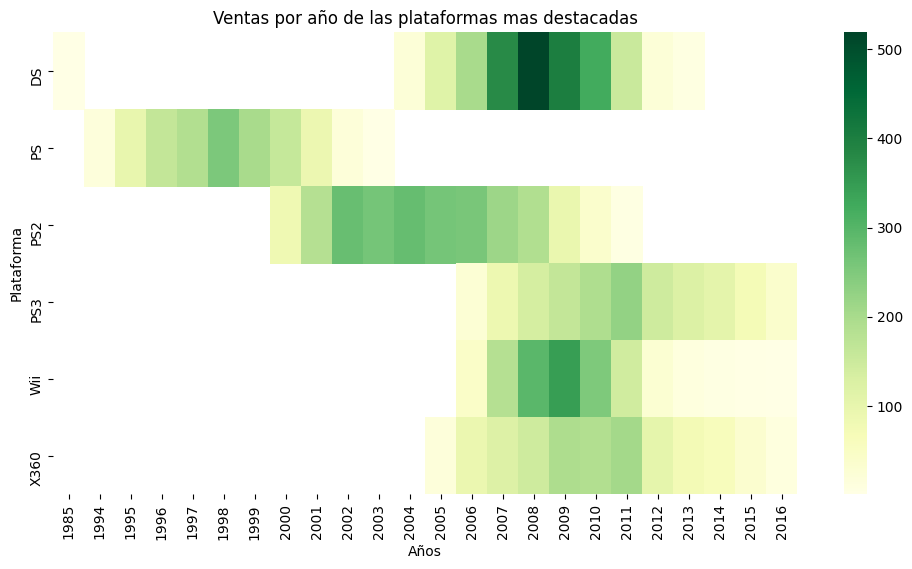

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(sales_year, cmap='YlGn') 
plt.title('Ventas por año de las plataformas mas destacadas')
plt.xlabel('Años' );
plt.ylabel('Plataforma');

In [43]:
#Analizamos las paltaformas con la diferencia de su minimo y maximo en su año de lanzamiento para obtener un estadistico de duración por plataforma 
duration_platform = base_df.query('year_of_release!="-1"').pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
duration_platform.columns=['platform', 'min_year', 'max_year']
duration_platform['duration'] = duration_platform.apply(lambda x:x['max_year']-x['min_year'], axis=1)
duration_platform

,platform,min_year,max_year,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


In [44]:
# Y aplicamos la media a esta toma
duration_platform['duration'].mean()

7.612903225806452

In [45]:
#Se determina el periodo que tomaremos para contriuir un modelo para 2017. Siendo de 2012 en adelante la muestra que analizaremos a continuación.
base_muestra=base_df[(base_df.year_of_release > 2012)] 
base_muestra

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_for_year
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,5.26
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,4.07
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,76.0,7.1,M,14.63,7.32
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69.0,7.5,T,14.60,3.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,70.5,7.1,E,0.01,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,70.5,7.1,E,0.01,0.00
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.3,T,0.01,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,70.5,7.1,E,0.01,0.01


In [46]:
#valores estadistico de nuestra nueva muestra en el que nos vamos a enfocar para la proyección para 2017
base_muestra.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,sales_for_year
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,2014.475190,0.195834,0.175445,0.062977,0.053661,70.857398,6.882030,0.487917,0.207720
std,1.089853,0.547264,0.512026,0.233797,0.165552,9.597711,1.251934,1.234199,0.527178
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000,0.000000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,68.000000,6.600000,0.030000,0.020000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,71.000000,7.200000,0.110000,0.050000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,75.000000,7.600000,0.400000,0.170000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000,7.600000


<Figure size 1600x1000 with 0 Axes>

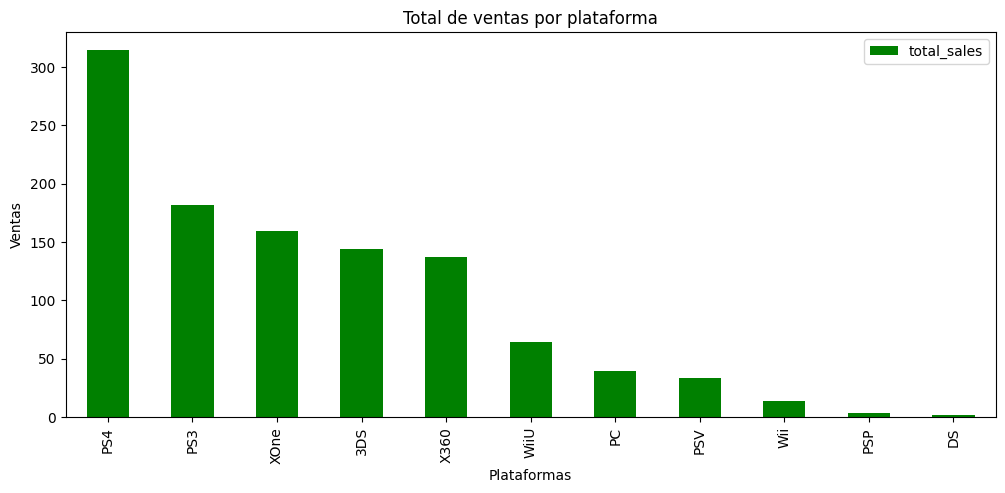

In [47]:
# Analizamos el total de ventas por plataforma de nuestra nueva muestra para anliasa la tendencia. 
plt.figure(figsize=(16,10))
segmento = base_muestra.pivot_table(index = "platform", values = "total_sales", aggfunc="sum").sort_values('total_sales', ascending=False) 
segmento.plot(
    kind='bar',
    title='Total de ventas por plataforma', 
    figsize=[12, 5],
    color=['Green'],
    xlabel='Plataformas',
    ylabel='Ventas',
)

plt.show()


Siendo PS4, PS3, XONE, 3DS, X360 las plataformas con mas ventas de nuestra muestra.

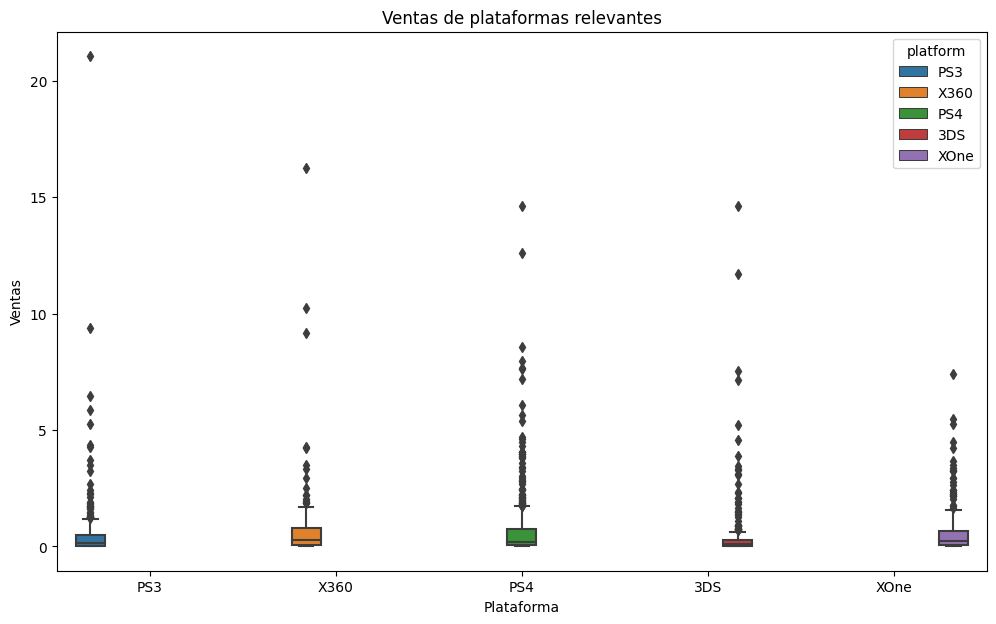

In [48]:
relevantes = base_muestra[base_muestra['platform'].isin(['PS4', 'PS3', 'XOne', '3DS', 'X360'])]
plt.figure(figsize=(12,7))
sns.boxplot(x='platform', 
            y='total_sales', 
            hue='platform', 
            data= relevantes)
plt.title('Ventas de plataformas relevantes')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.show()


# Relacion de reseñas y ventas

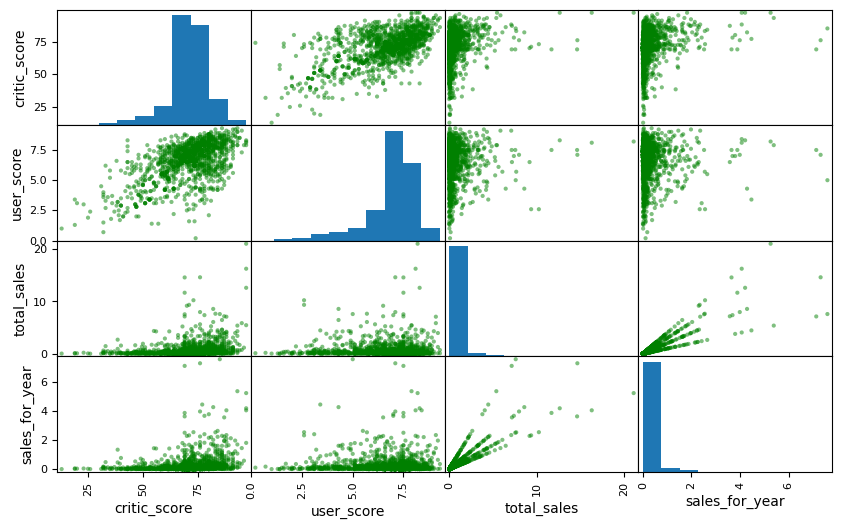

In [49]:
#Se analiza cómo las reseñas afectan las ventas con todas las plataformas
scat_matrix = pd.plotting.scatter_matrix(base_muestra.loc[:,['critic_score','user_score','total_sales','sales_for_year']]
         , figsize=(10, 6),color=['Green'])

In [50]:
base_muestra.loc[:,['critic_score','total_sales','sales_for_year']].corr()


,critic_score,total_sales,sales_for_year
critic_score,1.000000,0.221051,0.228104
total_sales,0.221051,1.000000,0.871559
sales_for_year,0.228104,0.871559,1.000000


In [51]:
#Correlación Pearson

c , p = st.pearsonr(base_muestra.query('critic_score.isna() == False')['critic_score'], 
                    base_muestra.query('critic_score.isna() == False')['total_sales'])

print(f"Valor coeficiente = {c}, Valor p-value ={p}")

alpha= 0.05


if p < alpha:
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')



Valor coeficiente = 0.22105134469640766, Valor p-value =3.675713237883389e-26
Rechazamos la hipótesis nula.


# No tenemos suficiente evidencia que desmuestre que critic_score y total_sale no esten relacionacionadas. 

# Ventas del mismo juego en diferentes plataformas



In [52]:
#Buscamos una de la franquicias mas constantes en las diferentes plataformas que FIFA
base_muestra[base_muestra.name.str.contains('FIFA')]['name'].value_counts()

FIFA 14                       9
FIFA 15                       8
FIFA 16                       5
FIFA 17                       5
2014 FIFA World Cup Brazil    2
Name: name, dtype: int64

In [53]:
#Analizamos el título FIFA 14  que el que tenemos en más plataformas con 9.
base_muestra.query("name=='FIFA 14'")


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_for_year
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46,1.62
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22,1.06
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01,0.75
1752,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E,1.16,0.29
4698,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,35.5,1.8,E,0.41,0.10
4808,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E,0.40,0.10
4984,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,64.0,4.3,E,0.38,0.10
6870,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,68.0,6.9,E,0.23,0.06
7874,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,53.0,3.4,E,0.19,0.05


In [54]:
#Y el ultimo o más nuevo 
base_muestra.query("name=='FIFA 17'")


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_for_year
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,7.60
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65,2.65
2781,FIFA 17,PS3,2016,Sports,0.05,0.55,0.03,0.10,49.0,3.3,E,0.73,0.73
5009,FIFA 17,X360,2016,Sports,0.07,0.28,0.00,0.03,39.5,1.7,E,0.38,0.38
9954,FIFA 17,PC,2016,Sports,0.00,0.11,0.00,0.01,84.0,4.2,E,0.12,0.12


FIFA 14 se lanzo en 2013 para 9 plataformas diferentes y su mayor volumen de venta esta ubicado en las consolas con más auge de esa generacion coomo en PS3 y X360

FIFA 17 se lanzo en 2016 ya solo en 5 plataformas esto puede ser por el poco indice de ventas de algunas plataformas como lo pudimos revisar con el FIFA 14 y en contra parte su volumen de venta esta con las nuevas geneeracion de plataformas que son PS4 y XONE.

Con esto nos damos cuenta que la muestra es similar las ventas para las consolas siendo PS3, PS4 y XBOX en sus versiones XONE y X360 que es donde mas ventas tenemos de la franquicia. Y siendo la zona Europa la que mas ventas tiene de estos titulos.  

# Analisis por genero

In [55]:
#Revisamos los generos más relevantes de nuestra muestra actual.
base_muestra['genre'].value_counts()


Action          767
Role-Playing    294
Adventure       246
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [56]:
#Realizamos el analisis de ventas por genero
genero = base_muestra.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genero)

genre
Action          322.27
Shooter         232.98
Sports          150.65
Role-Playing    146.18
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.73
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


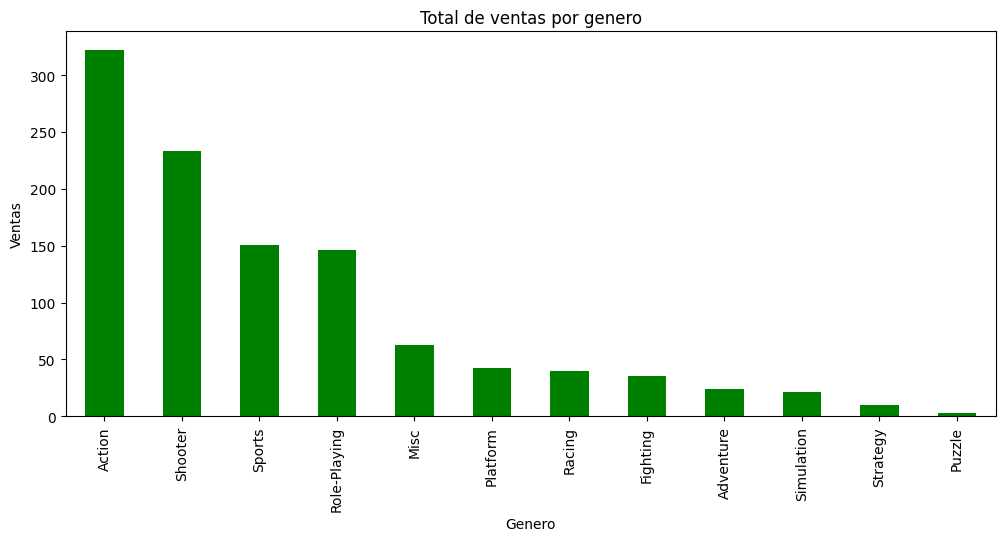

In [57]:
#Y graficamos nuestro resultado. 
genero.plot(
    kind='bar',
    title='Total de ventas por genero', 
    figsize=[12, 5],
    color=['Green'],
    xlabel='Genero',
    ylabel='Ventas',
)

plt.show()

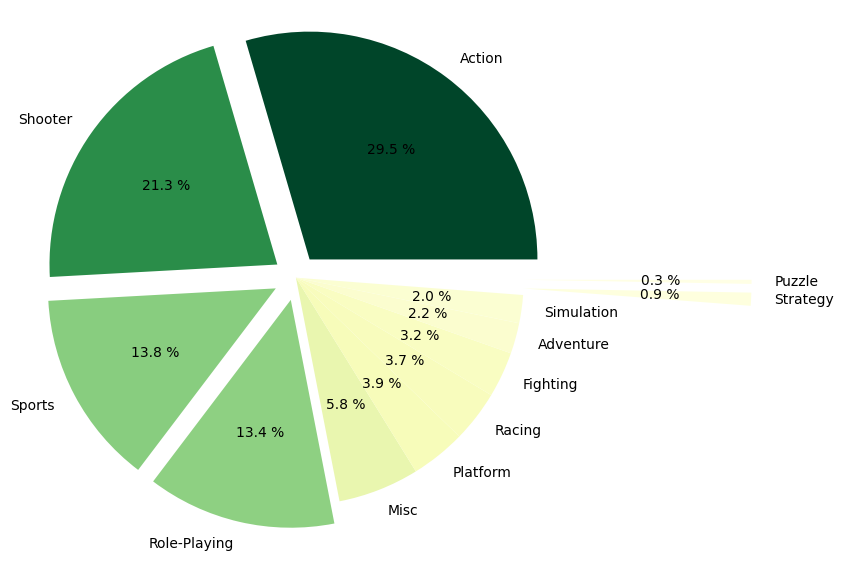

In [58]:
# Con el fin de ver mas visual nuestros datos trabajamos una grafica de pay con sus respectivos porcentajes.
plt.figure(figsize=(10,7))
genre = ["Action","Shooter","Sports","Role-Playing","Misc","Platform","Racing","Fighting","Adventure","Simulation","Strategy","Puzzle"]
desfase = (0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 1, 1)
normdata = colors.Normalize(min(genero), max(genero))
colormap = cm.get_cmap("YlGn")
colores =colormap(normdata(genero))

plt.pie(genero, labels= genre, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

# Conclusión: 
El analsis nos permitio verificar que los títulos de Acción y Shooter son los que tiene mayor relevancia en nuestra muestra ya sea por suma de las ventas globales o por la cantidad de juegos de este genero. Por lo que muestra tendra que enfocarse en estos generos para las proyeccion de 2017 y de la misma manera en un segundo termino en los generos Sports y Role-Playing ya que con estos cuatro generos tenemos casi el 70% de mercado. Ahora analisaremos los datos pero por región para conicer mejor la tendencia.

# Perfil de usuario para cada región

A continuación, se analizan las diferencias entre regiones:

* Analizaremos las cinco plataformas principales por región
* Los cinco géneros principales
* Las ventas y su variacion con las clasificaciones de ESRB por regiones.


# Región NA (Norteamérica)


          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.46


<AxesSubplot:ylabel='platform'>

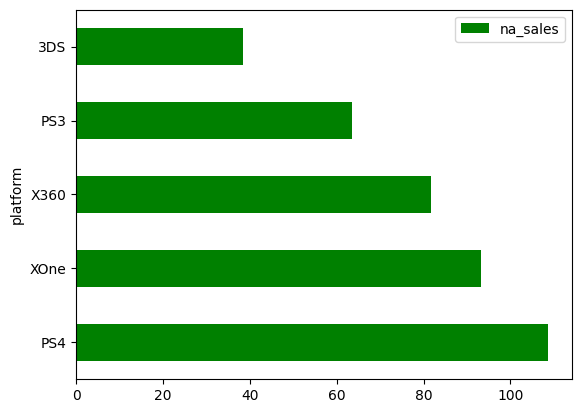

In [59]:
NA = base_muestra.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)

print(NA)

NA.plot(kind='barh',color=['Green'])


genre
Shooter     0.586845
Sports      0.305000
Platform    0.245135
Fighting    0.194375
Misc        0.177355
Name: na_sales, dtype: float64


<AxesSubplot:ylabel='genre'>

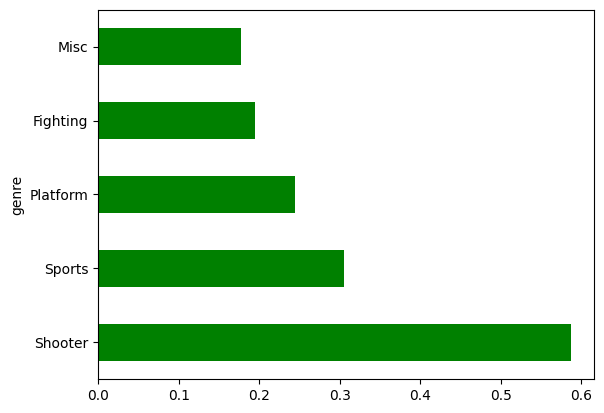

In [60]:
#Analizamos el top de genero con el mayor promedio historico
NA_g = base_muestra.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head(5)

print(NA_g)

NA_g.plot(kind='barh',color=['Green'])

<AxesSubplot:title={'center':'Region NA Top Ventas-Ratings'}, ylabel='na_sales'>

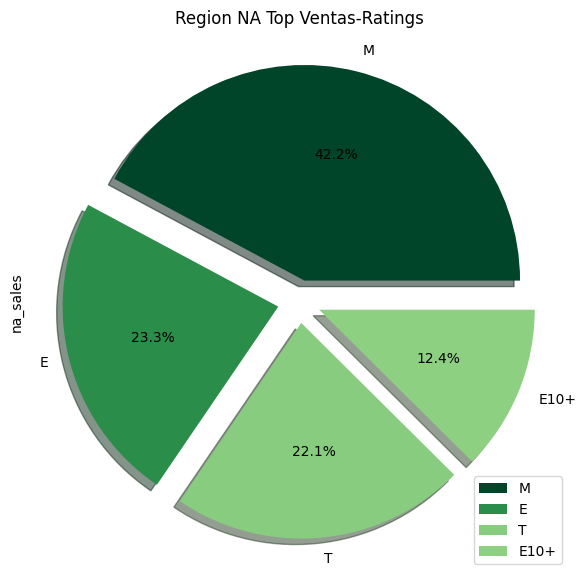

In [61]:
esrb_na = base_muestra.groupby(['rating'])['na_sales'].sum().sort_values(ascending = False).reset_index()

desfase = (0.1, 0.1, 0.1, 0.1)
normdata = colors.Normalize(min(genero), max(genero))
colormap = cm.get_cmap("YlGn")
colores =colormap(normdata(genero))

esrb_na.set_index('rating').plot(y='na_sales', kind='pie',title = 'Region NA Top Ventas-Ratings', autopct='%1.1f%%', figsize=(9, 7), colors=colores, explode=desfase, shadow=True)

# Región EU (Europa)

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          31.15


<AxesSubplot:ylabel='platform'>

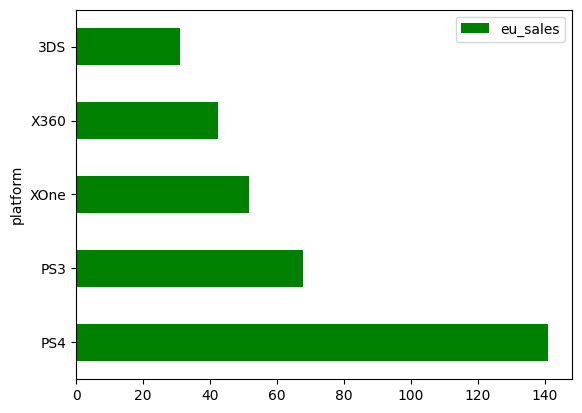

In [62]:
EU = base_muestra.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)

print(EU)

EU.plot(kind='barh',color=['Green'])


genre
Shooter       0.469840
Sports        0.282804
Racing        0.237529
Platform      0.210541
Simulation    0.176129
Name: eu_sales, dtype: float64


<AxesSubplot:ylabel='genre'>

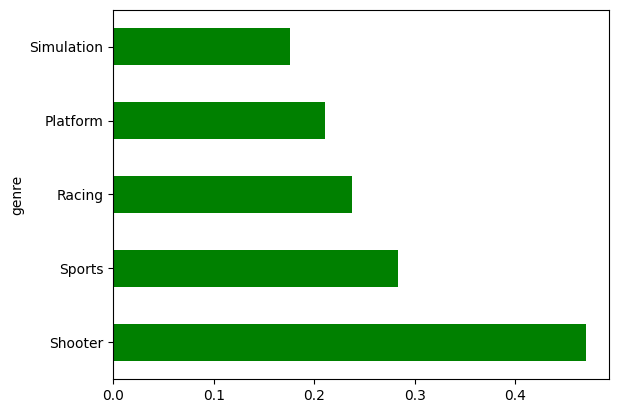

In [63]:
EU_g = base_muestra.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head(5)

print(EU_g)

EU_g.plot(kind='barh',color=['Green'])

<AxesSubplot:title={'center':'Region EU Top Ventas-Ratings'}, ylabel='eu_sales'>

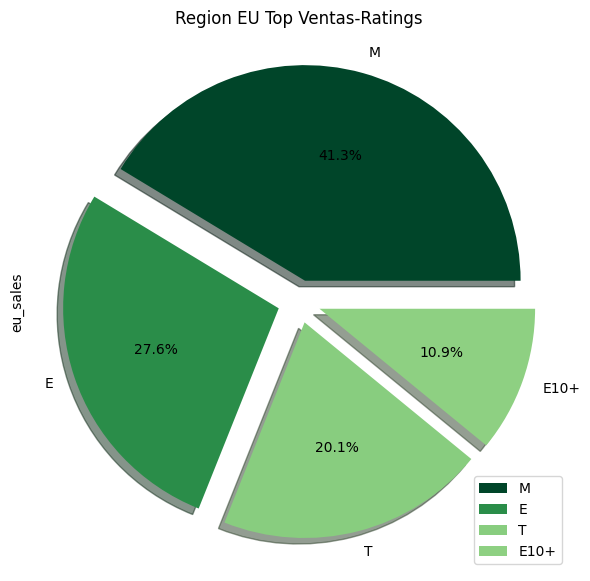

In [64]:
esrb_eu = base_muestra.groupby(['rating'])['eu_sales'].sum().sort_values(ascending = False).reset_index()

desfase = (0.1, 0.1, 0.1, 0.1)
normdata = colors.Normalize(min(genero), max(genero))
colormap = cm.get_cmap("YlGn")
colores =colormap(normdata(genero))

esrb_eu.set_index('rating').plot(y='eu_sales', kind='pie',title = 'Region EU Top Ventas-Ratings',figsize=(9, 7), colors=colores, explode=desfase, autopct='%1.1f%%', shadow=True)

# Región JP (Japon)

          jp_sales
platform          
3DS          67.84
PS3          23.35
PSV          18.66
PS4          15.96
WiiU         10.88


<AxesSubplot:ylabel='platform'>

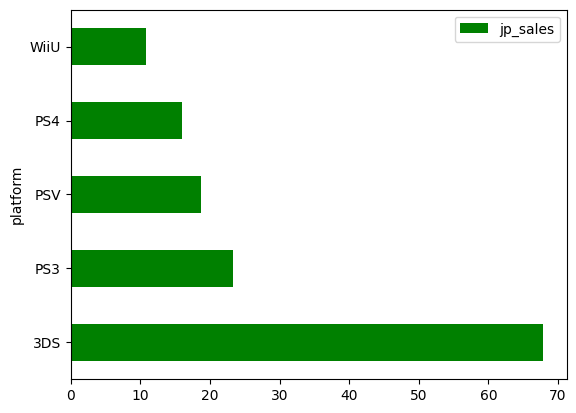

In [65]:
JP = base_muestra.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)

print(JP)

JP.plot(kind='barh',color=['Green'])

genre
Role-Playing    0.173946
Fighting        0.095625
Simulation      0.072903
Puzzle          0.069412
Platform        0.064730
Name: jp_sales, dtype: float64


<AxesSubplot:ylabel='genre'>

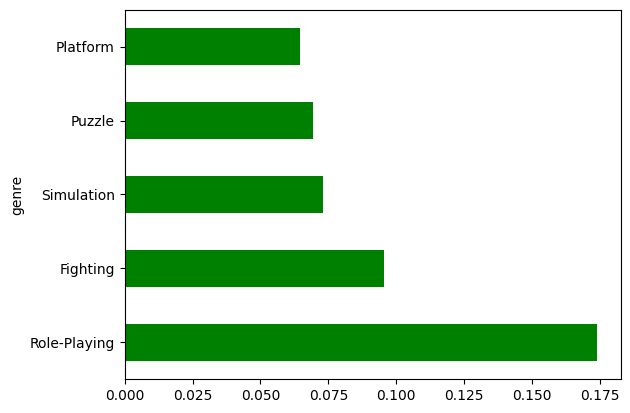

In [66]:
JP_g = base_muestra.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head(5)

print(JP_g)

JP_g.plot(kind='barh',color=['Green'])

<AxesSubplot:title={'center':'Region JP Top Ventas-Ratings'}, ylabel='jp_sales'>

<Figure size 1000x700 with 0 Axes>

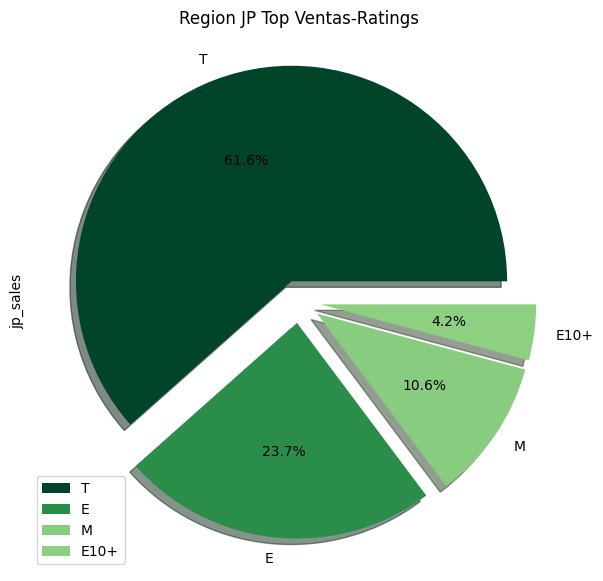

In [67]:
esrb_jp = base_muestra.groupby(['rating'])['jp_sales'].sum().sort_values(ascending = False).reset_index()

plt.figure(figsize=(10,7))
desfase = (0.1, 0.1, 0.1, 0.1)
normdata = colors.Normalize(min(genero), max(genero))
colormap = cm.get_cmap("YlGn")
colores =colormap(normdata(genero))

esrb_jp.set_index('rating').plot(y='jp_sales', kind='pie',title = 'Region JP Top Ventas-Ratings', figsize=(9, 7),colors=colores, explode=desfase, autopct='%1.1f%%', shadow=True)

**Muestra Global**

In [68]:
base_muestra.groupby('genre')['total_sales'].mean().sort_values(ascending=False).head(6)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.497211
Racing          0.469294
Fighting        0.441375
Name: total_sales, dtype: float64

In [69]:
base_muestra.groupby(['rating'])['total_sales'].sum().sort_values(ascending = False).reset_index().head(10)

,rating,total_sales
0,M,414.72
1,T,288.13
2,E,272.74
3,E10+,115.88


In [70]:
base_muestra.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(4)


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.77
Name: total_sales, dtype: float64

# Conclusión

La muestra nos permite identificar que las nuestras de Norte America y Europa son mercado similares tanto en tendencia de ventas por plataforma donde Sony con su plataformas PS4, PS3 y en el caso de Micosoft con XONE, X360 lideran el mercado actualmente en caso menor de participacion en un 5 lugar tenemos a Nitendo con su plataforma 3DS. Pero este escenario ccambia drasticamente para la región de Japon ya que en esta aunque con menor venta es liderada por el 3DS y los productos de Sony PS3, PSv, PS4 y por ultino WiiU. Ademas que pasa algo similar con los generos y el rating por lo que tendriamos que analisar y tener en cuenta para cada región al momento de generar campañas diridas.

# Prueba de hipótesis

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [71]:
# Prueba las hipótesis

#α = 0.05 (5%):

#Equilibrio entre el riesgo de errores de Tipo I y Tipo II.

#Comúnmente utilizado en muchos campos.

#H0 = Las calificaciones promedio de los usuarios de las Xbox One y PC Xbox One y PC son iguales.
#H1 = Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son diferentes.

In [72]:
xbox = base_muestra[(base_muestra['platform'] == 'XOne') & (base_muestra['user_score'] > 0)]['user_score']
pc = base_muestra[(base_muestra['platform'] == 'PC') & (base_muestra['user_score'] > 0)]['user_score']

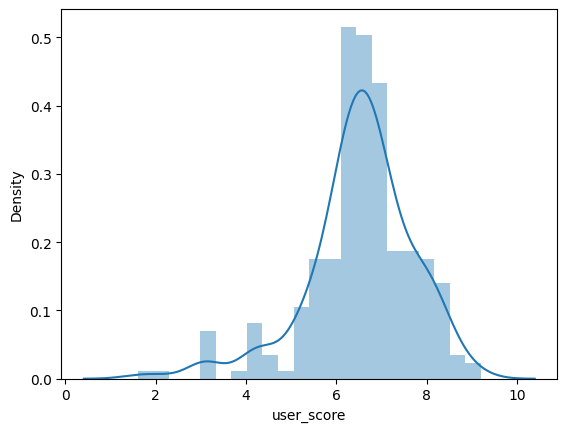

In [73]:
sns.distplot(xbox)
plt.show()

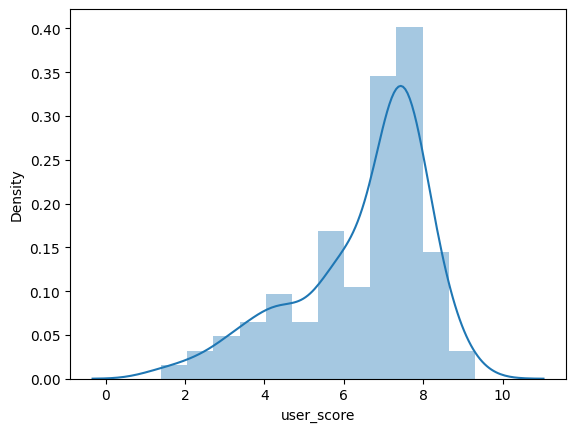

In [74]:
sns.distplot(pc)
plt.show()

In [75]:
# T-test de varianzas distintas.
alpha = 0.05

results=st.ttest_ind(xbox, pc, equal_var = False)

print(results)

if (results.pvalue < alpha):
    print("Rechazamos La Hipótesis Nula")
else:
    print("No Rechazamos La Hipótesis Nula")

Ttest_indResult(statistic=0.25638784178769736, pvalue=0.7978115015456142)
No Rechazamos La Hipótesis Nula


# No tenemos evidencia suficiente para afirmar que las calificaciones promedio de los usuarios de las Xbox One y PC son diferentes.

In [76]:
# Prueba las hipótesis

#α = 0.05 (5%):

#Equilibrio entre el riesgo de errores de Tipo I y Tipo II.

#Comúnmente utilizado en muchos campos.

#H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

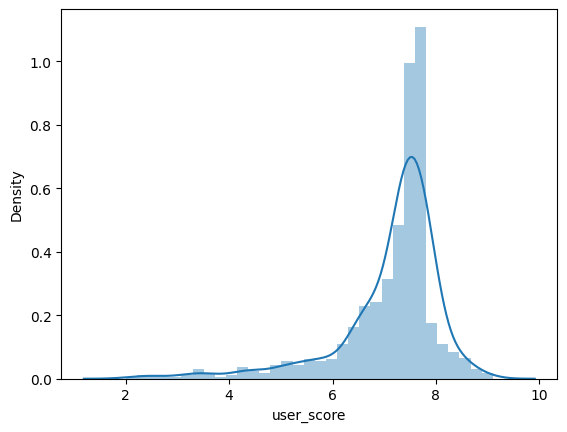

In [77]:
action = base_muestra[(base_muestra['genre'] == 'Action') & (base_muestra['user_score'] > 0)]['user_score']
sns.distplot(action)
plt.show()

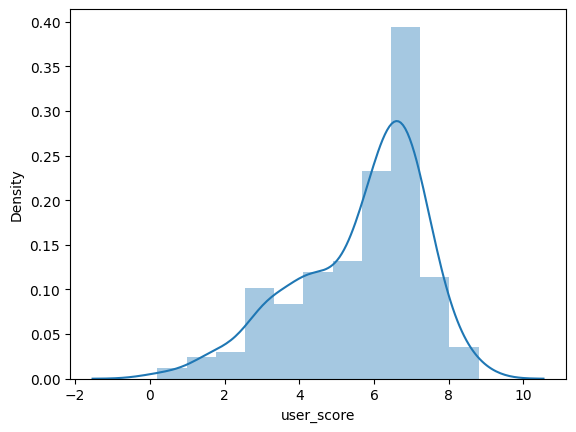

In [78]:
sports = base_muestra[(base_muestra['genre'] == 'Sports') & (base_muestra['user_score'] > 0)]['user_score']
sns.distplot(sports)
plt.show()

In [79]:
# Revisamos el valor de variaza para action
np.var(action)

1.0415568963553627

In [80]:
# Y del mismo caso para sports y asi comprobamos que son direferentes. 
np.var(sports)

2.848242641278714

In [81]:
#  Por lo que aplicamos T-test de varianzas distintas.
alpha = 0.05

results2=st.ttest_ind(action, sports, equal_var = False)

print(results2)

if (results2.pvalue < alpha):
    print("Rechazamos La Hipótesis Nula")
else:
    print("No Rechazamos La Hipótesis Nula")

Ttest_indResult(statistic=12.307186181373721, pvalue=1.0866023975761332e-27)
Rechazamos La Hipótesis Nula


# No tenemos evidencia suficiente para afirmar que las calificaciones promedio de los usuarios de los géneros de Acción y Deportes son iguales.



# CONCLUSIÓN 

El analisis nos permitio ver de forma más visible las tendencias y los valores que especificos que nos permitiran planificar campañas publicitarias más exitosas. Ya que conocemos cuales son las estadisticas de venta por consolas, region, rating y generos prefereido por nuestras audencias.

Cabe recalcar que el mercado a cambiado banstante como pudimos ver tuvimos un auge del 2006 a 2011 y del 2012 en dalante bajarn las ventas casi un 50% y se han mantenido. Es por eso que nuestro analsis de dividio en dos con la muestra completa y con muestra muestra recortada que nos permitiera analisar nuestra actualidad y del mercado. Decidimos recopilar datos de los últimos 5 años para elaborar un pronóstico para 2017, ya que consideramos que serían los más relevantes para nuestra situación en 2017.

En base en lo anterior las 5 plataformas más vendidas en ese periodo son: PS4, PS3, Xbox 360, 3DS y Xbox One.

Los juegos de Acción son los más lanzados y vendidos historicamente. 

Los juegos de Shooter(disparos) registran la mayor cantidad de ventas por juego. 

En general, los juegos de Role-Playing, Misc, Plataform se venden significativamente menos que juegos más activos como acción, disparos y deportes. 

El genero menos vendido es Puzzle(rompecabezas).

Descubrimos que el comportamiento general en Norteamérica y la Unión Europea es muy similar, mientras que en Japón es muy diferente.

Se probaron las hipótesis y concluimos que:

Las valoraciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Las valoraciones promedio de los usuarios para los géneros de acción y deportes difieren.

Para nuestro analisis de mercado podemos conlcuir que: 

Se puede utilizar para Norteamerica y Europa campañas similares por la similitudes que comparte. 
Se deben de enfocar en juegos de Shooter(disparos) ademas de incluir los juegos con clasificacion  M (Mature mayores de 17 años) por la tendencia que tienen. 

En contra parte para la región de Japon se necesitaria uan capaña personalizada que se enfoque en los juegos de Rol y en el genero T (Adolescentes mayores de 13 años) que es su tendencia.

Por lo que con esto se podria definir los espacios publicitarios y campañas para cada publico y mercado en especifico.
